<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Linear%20Regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [0]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1. Boston Dataset

### 1.1 Boston Data Details

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [0]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [0]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
print(bos.head())
print(bos.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.0000

## 2. Linear Regression from scratch

### 2.1 Cost Function and Gradient Descent

> The **hypothesis** of Linear Regression is:  

>> $ h_\theta(x) =  \theta_0 +  \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $

>> Or: $ h_\theta(x)  =  \theta ^ T x $

> The **Cost Function** is:

>> $ J( \theta ) = \frac{\mathrm{1} }{2m}  \sum_{i=1}^{m} (h_ \theta (x^i) - y^i )^2 +    \frac{\mathrm{\lambda} }{2m} \sum_{j=1}^{n} \theta_j^2   $

> The **Gradient Descent** is the partial derivative of the cost function, as below:

>> $  \frac{\partial J( \theta ) }{\partial \theta_j} = \frac{\mathrm{1} }{m}  \sum_{i=1}^{m} ( h_\theta(x^i) - y^i ) x^i_j  $

In [0]:
def prediction(X, theta):
    return X @ theta

def costFunction(X, y, theta, lmbda):
    temp = prediction(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*len(X)) + np.sum(theta[1:]**2) * lmbda / (2*len(X))
  
def gradientDescent(X, y, theta, alpha, lmbda, iterations):
    cost_history = [] #Used to plot cost as function of iteration
    theta_history = [] #Used to visualize the minimization path later on
    m = len(y)
    for _ in range(iterations):
        temp = prediction(X, theta) - y
        temp = X.T @ temp
        theta = theta - (alpha/m) * temp
        theta = theta + theta * lmbda / m
        theta[0] = theta[0] - theta[0] * lmbda / m
        theta_history.append(list(theta[:,0]))
        cost_history.append(costFunction(X, y, theta, lmbda))
    return theta, cost_history, theta_history


#Plot the convergence of the cost function
def plotConvergence(cost_history, iterations):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(cost_history)),cost_history,'b.')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    dummy = plt.ylim([min(cost_history)-0.2*(max(cost_history)-min(cost_history)), max(cost_history)+0.2*(max(cost_history)-min(cost_history))])


### 2.2 Feature Scaling and Add Bias vector

In [0]:
from sklearn.preprocessing import StandardScaler

X = boston.data
y = boston.target

sc = StandardScaler()
X = sc.fit_transform(X)

m = X.shape[0]
X = np.hstack((np.ones((m,1)), X))

#y shape looks like (m,), make it looks like (m,1)
#the below gradientDescent function requires it to be like (m,1)
y = y[:,np.newaxis]

### 2.2 Split the train and test data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X.shape)
print(y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(506, 14)
(506, 1)
(404, 14) (404, 1)
(102, 14) (102, 1)


### 2.3 Compute initial cost

In [0]:
m, n = X_train.shape
theta = np.zeros([n,1])
iterations = 500
alpha = 0.02
lmbda = 0.01


J = costFunction(X_train, y_train, theta, lmbda)
print(J)

298.2204455445544


### 2.4 Run Gradient Descent

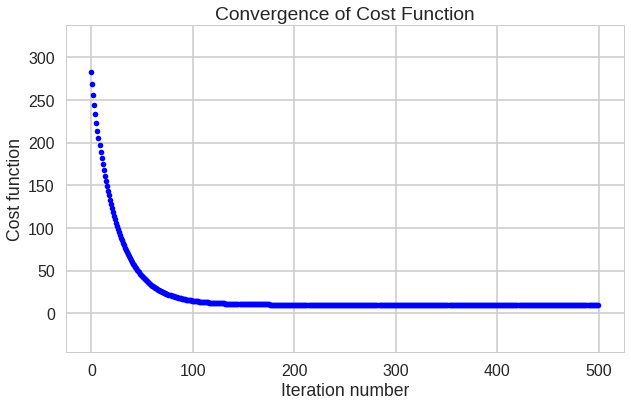

In [0]:
theta, cost_history, theta_history = gradientDescent(X_train, y_train, theta, alpha, lmbda, iterations)
plotConvergence(cost_history, iterations)

### 2.5 Final Cost ans Predictions

Final Cost:  9.75897639413963


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

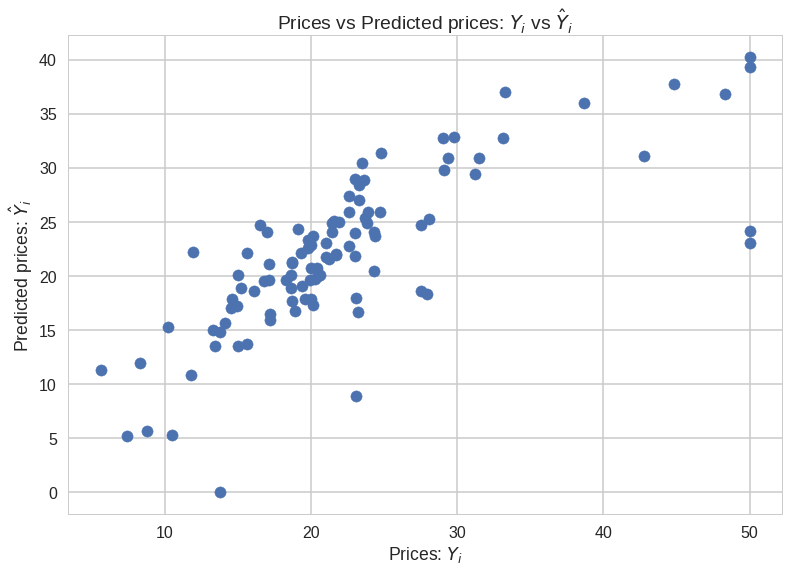

In [0]:
J = costFunction(X_train, y_train, theta, lmbda)
print("Final Cost: ", J)


#y_pred = np.dot(X_test, theta)
y_pred = prediction(X_test, theta)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")


In [0]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)

34.61327922801189


## 3. Linear Regression with sklearn

In [0]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)


In [0]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)

33.44897999767657
